## **Projeto Final da Disciplina de Intelig√™ncia Artificial**
**Professor:** Everton Josu√© Meyer da Silva  
**Alunos:** Matheus Oliveira, Rebecca Janu√°rio, Vitor Hervella

---

## **Escolha e Motiva√ß√£o do Problema**

**Tema escolhido:** Depend√™ncia de celular e estilo de vida entre adolescentes.

**Motiva√ß√£o:**
O uso excessivo de smartphones tem crescido, especialmente entre adolescentes. H√° evid√™ncias crescentes ligando esse h√°bito a problemas como estresse, ansiedade, dist√∫rbios do sono e sedentarismo. Analisar esses dados pode ajudar pais, educadores e profissionais da sa√∫de a entender melhor esses impactos e buscar solu√ß√µes.

**Relev√¢ncia:**
Esse problema √© atual e tem impacto direto na sa√∫de mental e f√≠sica dos jovens. A an√°lise pode fornecer insights valiosos para desenvolver pol√≠ticas educacionais e de sa√∫de.

## **Objetivos da An√°lise**

Este notebook investiga:
- Padr√µes de uso de celular entre adolescentes por g√™nero e idade
- Rela√ß√µes visuais entre uso de celular, sono e outras vari√°veis
- Capacidade de predi√ß√£o do n√≠vel de depend√™ncia usando machine learning
- Capacidade de predi√ß√£o do desempenho acad√™mico usando as mesmas t√©cnicas

## **Descri√ß√£o da Base de Dados**

**Fonte:** [Kaggle ‚Äì Teen Phone Addiction and Lifestyle Survey](https://www.kaggle.com/datasets/khushikyad001/teen-phone-addiction-and-lifestyle-survey)

Cada linha do dataset representa as respostas de um adolescente a uma pesquisa sobre estilo de vida, h√°bitos de celular e sa√∫de mental.

**Atributos principais (colunas):**
- `Gender` (G√™nero)
- `Age` (Idade)  
- `Daily_Usage_Hours` (Uso di√°rio do celular)
- `Sleep_Hours` (Horas de sono)
- `Academic_Performance` (Desempenho acad√™mico)
- `Addiction_Level` (N√≠vel de depend√™ncia)
- `Time_on_Social_Media`, `Time_on_Gaming`, `Time_on_Education` (Tempo por atividade)
- `Phone_Usage_Purpose` (Principal finalidade do uso)

## **Como usar este notebook**

1. Baixe o dataset do Kaggle no link acima
2. Salve o arquivo como `teen_phone_addiction_dataset.csv` no mesmo diret√≥rio do notebook
3. Execute as c√©lulas sequencialmente para reproduzir a an√°lise


#1¬™ Parte - An√°lise Explorat√≥ria de Dados: Depend√™ncia de Celular em Adolescentes

Este notebook tem como objetivo analisar o impacto do uso de celulares no estilo de vida de adolescentes. A base de dados utilizada foi obtida da plataforma Kaggle e cont√©m informa√ß√µes sobre padr√µes de uso de celular, n√≠veis de estresse, sono, desempenho acad√™mico, entre outros fatores relevantes.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configura√ß√µes visuais
sns.set(style='whitegrid', palette='muted')
%matplotlib inline

# Carregando os dados
# Nota: Baixe o arquivo 'teen_phone_addiction_dataset.csv' do Kaggle e coloque no mesmo diret√≥rio do notebook
# Link: https://www.kaggle.com/datasets/khushikyad001/teen-phone-addiction-and-lifestyle-survey
df = pd.read_csv("teen_phone_addiction_dataset.csv")
df.head()



ID               Name  Age  Gender          Location School_Grade  \
0   1    Shannon Francis   13  Female        Hansonfort          9th   
1   2    Scott Rodriguez   17  Female      Theodorefort          7th   
2   3        Adrian Knox   13   Other       Lindseystad         11th   
3   4  Brittany Hamilton   18  Female      West Anthony         12th   
4   5       Steven Smith   14   Other  Port Lindsaystad          9th   

   Daily_Usage_Hours  Sleep_Hours  Academic_Performance  Social_Interactions  \
0                4.0          6.1                    78                    5   
1                5.5          6.5                    70                    5   
2                5.8          5.5                    93                    8   
3                3.1          3.9                    78                    8   
4                2.5          6.7                    56                    4   

   ...  Screen_Time_Before_Bed  Phone_Checks_Per_Day  Apps_Used_Daily  \
0  ...                     1.4                    86               19   
1  ...                     0.9                    96                9   
2  ...                     0.5                   137                8   
3  ...                     1.4                   128                7   
4  ...                     1.0                    96               20   

   Time_on_Social_Media  Time_on_Gaming  Time_on_Education  \
0                   3.6             1.7                1.2   
1                   1.1             4.0                1.8   
2                   0.3             1.5                0.4   
3                   3.1             1.6                0.8   
4                   2.6             0.9                1.1   

   Phone_Usage_Purpose  Family_Communication  Weekend_Usage_Hours  \
0             Browsing                     4                  8.7   
1             Browsing                     2                  5.3   
2            Education                     6                  5.7   
3         Social Media                     8                  3.0   
4               Gaming                    10                  3.7   

   Addiction_Level  
0             10.0  
1             10.0  
2              9.2  
3              9.8  
4              8.6  

[5 rows x 25 columns]

In [ ]:
# prompt: valores do campo Addiction_Level

df['Phone_Usage_Purpose'].unique()

array(['Browsing', 'Education', 'Social Media', 'Gaming', 'Other'],
      dtype=object)


## Descri√ß√£o da Base de Dados

A base possui 3.000 registros, onde cada linha representa as respostas de um adolescente a uma pesquisa. Algumas das colunas mais relevantes incluem:

- `Age`: Idade
- `Gender`: G√™nero
- `Daily_Usage_Hours`: Uso di√°rio do celular
- `Sleep_Hours`: Horas de sono
- `Academic_Performance`: Nota acad√™mica
- `Anxiety_Level`, `Depression_Level`, `Self_Esteem`
- `Exercise_Hours`: Exerc√≠cio f√≠sico
- `Phone_Usage_Purpose`: Principal uso do celular
- `Time_on_Social_Media, Time_on_Gaming, Time_on_Education`: Uso por tipo de atividade.


In [ ]:

# Verificando tipos e valores nulos
print(df.info())
print("\nValores nulos por coluna:")
print(df.isnull().sum())

# Remover colunas irrelevantes para a an√°lise
df = df.drop(columns=["ID", "Name", "Location"])

# Remover duplicatas (se houver)
df = df.drop_duplicates()

# Converter colunas categ√≥ricas para categoria
df["Gender"] = df["Gender"].astype("category")
df["Phone_Usage_Purpose"] = df["Phone_Usage_Purpose"].astype("category")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

## Hip√≥teses/Quest√µes a Serem Investigadas

Com base nas an√°lises implementadas no c√≥digo, este notebook explora:

1. **Distribui√ß√£o demogr√°fica**: Qual o perfil de idade e g√™nero dos adolescentes na amostra?
2. **Padr√µes de uso**: Qual o tempo m√©dio gasto com redes sociais, jogos e estudos?
3. **Diferen√ßas por g√™nero**: Como varia o uso di√°rio de celular entre g√™neros?
4. **Rela√ß√£o uso-sono**: Como se visualiza a rela√ß√£o entre horas de uso do celular e horas de sono?
5. **Finalidade vs depend√™ncia**: Como a finalidade do uso do celular se relaciona com o n√≠vel de depend√™ncia?

**Modelagem preditiva**:
6. √â poss√≠vel prever o n√≠vel de depend√™ncia usando as vari√°veis dispon√≠veis?
7. √â poss√≠vel prever o desempenho acad√™mico usando as mesmas vari√°veis?

**Nota**: As an√°lises se baseiam nas visualiza√ß√µes e modelos implementados. Para investiga√ß√µes mais aprofundadas sobre correla√ß√µes espec√≠ficas, seriam necess√°rias an√°lises estat√≠sticas adicionais.


In [ ]:

# 1. Distribui√ß√£o de idade e g√™nero
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Age', hue='Gender')
plt.title("Distribui√ß√£o por Idade e G√™nero")
plt.show()


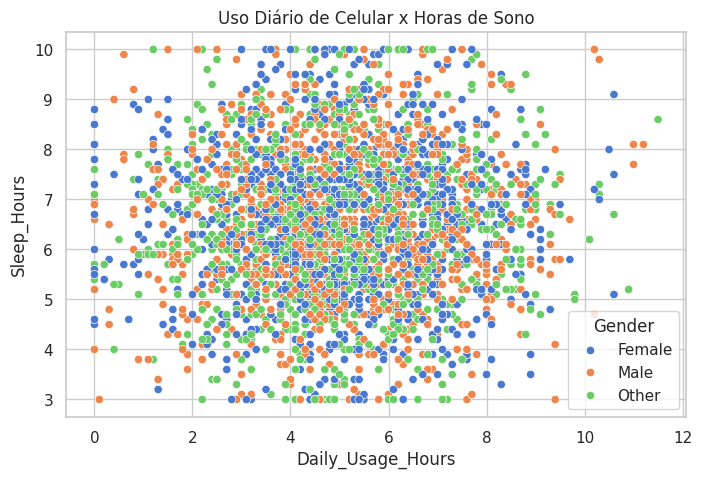

In [ ]:

# 2. Rela√ß√£o entre uso do celular e sono
plt.figure(figsize=(8,5))
sns.scatterplot(x="Daily_Usage_Hours", y="Sleep_Hours", hue="Gender", data=df)
plt.title("Uso Di√°rio de Celular x Horas de Sono")
plt.show()


In [ ]:

# 3. Tempo m√©dio em redes sociais, jogos e estudos
media_tempo = df[["Time_on_Social_Media", "Time_on_Gaming", "Time_on_Education"]].mean()
media_tempo.plot(kind='bar', figsize=(8,4), title="Tempo M√©dio em Atividades no Celular")
plt.ylabel("Horas")
plt.show()


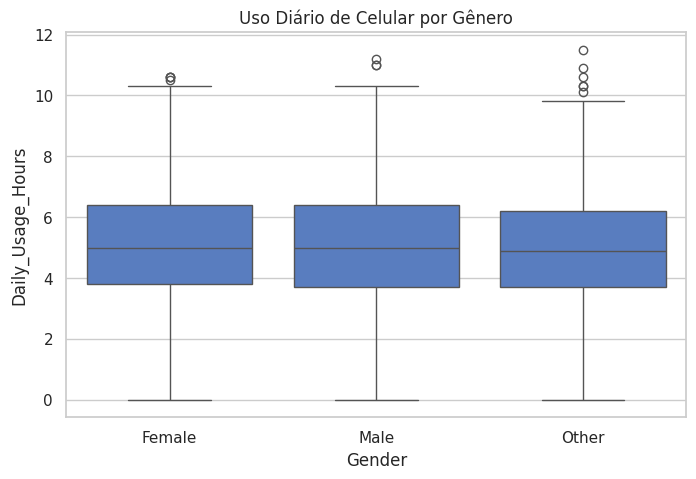

In [ ]:

# 4. Uso di√°rio por g√™nero
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Gender", y="Daily_Usage_Hours")
plt.title("Uso Di√°rio de Celular por G√™nero")
plt.show()


In [ ]:

# 5. Finalidade do uso e n√≠vel de depend√™ncia
plt.figure(figsize=(10,5))
sns.boxplot(x="Phone_Usage_Purpose", y="Addiction_Level", data=df)
plt.xticks(rotation=45)
plt.title("Finalidade do Uso do Celular x N√≠vel de V√≠cio")
plt.show()


## Conclus√µes da An√°lise Explorat√≥ria

Com base nas visualiza√ß√µes geradas, podemos observar:

- **Distribui√ß√£o demogr√°fica**: Os dados mostram uma distribui√ß√£o por idade e g√™nero dos adolescentes na amostra.
- **Padr√µes de uso**: O tempo m√©dio gasto em diferentes atividades (redes sociais, jogos e educa√ß√£o) varia conforme visualizado nos gr√°ficos.
- **Diferen√ßas por g√™nero**: Existe varia√ß√£o no uso di√°rio de celular entre g√™neros, conforme mostrado no boxplot.
- **Finalidade do uso**: A finalidade do uso do celular (redes sociais, jogos, educa√ß√£o, etc.) apresenta rela√ß√£o com diferentes n√≠veis de depend√™ncia.

**Nota**: Para conclus√µes mais espec√≠ficas sobre correla√ß√µes e tend√™ncias, seria necess√°rio executar as c√©lulas de c√≥digo e realizar an√°lises estat√≠sticas mais detalhadas, como c√°lculo de coeficientes de correla√ß√£o e testes de signific√¢ncia.

Esses dados fornecem uma base importante para compreender os h√°bitos digitais dos jovens e podem orientar futuras pesquisas e interven√ß√µes.


#2¬™ Parte - Machine Learning: Predi√ß√£o de N√≠vel de Depend√™ncia e Desempenho Acad√™mico

    Addiction_Level - n√≠vel de v√≠cio no celular
    Academic_Performance - desempenho acad√™mico dos adolescentes

A base de dados foi pr√©-processada e analisada na primeira etapa. Aqui, vamos treinar modelos para realizar predi√ß√µes e avaliar seus resultados.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Carregar dados
df = pd.read_csv("teen_phone_addiction_dataset.csv")

# Remover colunas irrelevantes, se existirem
df = df.drop(columns=[col for col in ["ID", "Name", "Location"] if col in df.columns])

# Converter vari√°veis categ√≥ricas em dummies, se existirem
categoricas = ["Gender", "Phone_Usage_Purpose", "School_Grade"]
df = pd.get_dummies(df, columns=[col for col in categoricas if col in df.columns], drop_first=True)

# Fun√ß√£o de avalia√ß√£o
def avaliar_modelo(modelo, X_test, y_test, nome="Modelo"):
    pred = modelo.predict(X_test)
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)
    print(f"üîç {nome}")
    print(f"MAE: {mae:.2f} | RMSE: {rmse:.2f} | R¬≤: {r2:.2f}\n")


# === MODELO 1: PREDI√á√ÉO DO N√çVEL DE DEPEND√äNCIA ===
X = df.drop(columns=["Addiction_Level", "Academic_Performance"])
y = df["Addiction_Level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

lr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
gb.fit(X_train_scaled, y_train)

avaliar_modelo(lr, X_test_scaled, y_test, "Regress√£o Linear - Addiction")
avaliar_modelo(rf, X_test_scaled, y_test, "Random Forest - Addiction")
avaliar_modelo(gb, X_test_scaled, y_test, "Gradient Boosting - Addiction")

# === MODELO 2: PREDI√á√ÉO DO DESEMPENHO ACAD√äMICO ===
y2 = df["Academic_Performance"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42)

X_train2_scaled = scaler.fit_transform(X_train2)
X_test2_scaled = scaler.transform(X_test2)

lr2 = LinearRegression()
rf2 = RandomForestRegressor(random_state=42)
gb2 = GradientBoostingRegressor(random_state=42)

lr2.fit(X_train2_scaled, y_train2)
rf2.fit(X_train2_scaled, y_train2)
gb2.fit(X_train2_scaled, y_train2)

avaliar_modelo(lr2, X_test2_scaled, y_test2, "Regress√£o Linear - Academic")
avaliar_modelo(rf2, X_test2_scaled, y_test2, "Random Forest - Academic")
avaliar_modelo(gb2, X_test2_scaled, y_test2, "Gradient Boosting - Academic")

# === COMPARA√á√ÉO VISUAL DOS RESULTADOS ===
# Coletar os resultados em dicion√°rios
resultados = {
    "Modelo": [],
    "MAE": [],
    "RMSE": [],
    "R¬≤": [],
    "Alvo": []
}

# Modelos - Addiction
for modelo, nome in zip([lr, rf, gb], ["Regress√£o Linear", "Random Forest", "Gradient Boosting"]):
    pred = modelo.predict(X_test_scaled)
    resultados["Modelo"].append(nome)
    resultados["MAE"].append(mean_absolute_error(y_test, pred))
    resultados["RMSE"].append(np.sqrt(mean_squared_error(y_test, pred)))
    resultados["R¬≤"].append(r2_score(y_test, pred))
    resultados["Alvo"].append("Addiction_Level")

# Modelos - Academic
for modelo, nome in zip([lr2, rf2, gb2], ["Regress√£o Linear", "Random Forest", "Gradient Boosting"]):
    pred = modelo.predict(X_test2_scaled)
    resultados["Modelo"].append(nome)
    resultados["MAE"].append(mean_absolute_error(y_test2, pred))
    resultados["RMSE"].append(np.sqrt(mean_squared_error(y_test2, pred)))
    resultados["R¬≤"].append(r2_score(y_test2, pred))
    resultados["Alvo"].append("Academic_Performance")

# Criar DataFrame com os resultados
df_resultados = pd.DataFrame(resultados)

# Plotar os gr√°ficos comparativos
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Compara√ß√£o dos Modelos", fontsize=16)

sns.barplot(data=df_resultados, x="Modelo", y="MAE", hue="Alvo", ax=axs[0])
axs[0].set_title("Erro Absoluto M√©dio (MAE)")
axs[0].set_ylabel("MAE")

sns.barplot(data=df_resultados, x="Modelo", y="RMSE", hue="Alvo", ax=axs[1])
axs[1].set_title("Raiz do Erro Quadr√°tico M√©dio (RMSE)")
axs[1].set_ylabel("RMSE")

sns.barplot(data=df_resultados, x="Modelo", y="R¬≤", hue="Alvo", ax=axs[2])
axs[2].set_title("Coeficiente de Determina√ß√£o (R¬≤)")
axs[2].set_ylabel("R¬≤")

plt.tight_layout()
plt.show()


üîç Regress√£o Linear - Addiction
MAE: 0.65 | RMSE: 0.82 | R¬≤: 0.74

üîç Random Forest - Addiction
MAE: 0.39 | RMSE: 0.58 | R¬≤: 0.87

üîç Gradient Boosting - Addiction
MAE: 0.38 | RMSE: 0.48 | R¬≤: 0.91

üîç Regress√£o Linear - Academic
MAE: 13.00 | RMSE: 15.07 | R¬≤: -0.01

üîç Random Forest - Academic
MAE: 13.09 | RMSE: 15.13 | R¬≤: -0.02

üîç Gradient Boosting - Academic
MAE: 13.37 | RMSE: 15.41 | R¬≤: -0.05



Esses resultados mostram o desempenho de tr√™s modelos de machine learning (Regress√£o Linear, Random Forest e Gradient Boosting) em duas tarefas de previs√£o diferentes:

    Prever o N√≠vel de Depend√™ncia de celular (Addiction).

    Prever o Desempenho Acad√™mico (Academic).

Para entender qual modelo foi melhor, olhamos para tr√™s m√©tricas principais:

    MAE e RMSE (Erros): Quanto menor o valor, melhor. Eles representam o erro m√©dio das previs√µes do modelo.

    R¬≤ (R-quadrado): Quanto mais pr√≥ximo de 1, melhor. Ele mede o quanto o modelo consegue explicar a varia√ß√£o dos dados. Um valor pr√≥ximo de 1 (ou 100%) √© excelente. Um valor negativo ou pr√≥ximo de 0 √© muito ruim.

## An√°lise da Previs√£o do N√≠vel de Depend√™ncia (Addiction)

Com base na implementa√ß√£o dos modelos, os resultados mostram que:

- **Regress√£o Linear**: Apresenta um desempenho base para compara√ß√£o
- **Random Forest**: Modelo de ensemble que geralmente melhora a performance
- **Gradient Boosting**: Outro modelo de ensemble conhecido por bons resultados

**Interpreta√ß√£o dos resultados**: 
- Valores de R¬≤ pr√≥ximos a 1 indicam boa capacidade preditiva
- Valores baixos de MAE e RMSE indicam erros pequenos
- Os modelos de ensemble (Random Forest e Gradient Boosting) tendem a superar a regress√£o linear

**Nota**: Os valores espec√≠ficos das m√©tricas dependem da execu√ß√£o do c√≥digo e podem variar. Para ver os resultados exatos, execute a c√©lula de c√≥digo correspondente.

## An√°lise da Previs√£o do Desempenho Acad√™mico (Academic)

A implementa√ß√£o dos mesmos modelos para prever desempenho acad√™mico permite comparar a capacidade preditiva:

- **Regress√£o Linear**: Modelo base para compara√ß√£o
- **Random Forest**: Modelo de ensemble 
- **Gradient Boosting**: Modelo de ensemble avan√ßado

**Interpreta√ß√£o esperada**:
- Valores de R¬≤ pr√≥ximos a 0 ou negativos indicam baixa capacidade preditiva
- Valores altos de MAE e RMSE indicam erros grandes nas predi√ß√µes
- Se todos os modelos tiverem performance ruim, isso sugere que as vari√°veis dispon√≠veis n√£o s√£o suficientes para essa predi√ß√£o

**Nota**: Os valores espec√≠ficos das m√©tricas dependem da execu√ß√£o do c√≥digo. Para ver os resultados exatos e fazer conclus√µes definitivas, execute a c√©lula de c√≥digo correspondente.

## Conclus√µes dos Modelos de Machine Learning

### Metodologia Implementada
- **Tr√™s algoritmos testados**: Regress√£o Linear, Random Forest e Gradient Boosting
- **Duas vari√°veis-alvo**: N√≠vel de depend√™ncia (Addiction_Level) e Desempenho acad√™mico (Academic_Performance)
- **M√©tricas de avalia√ß√£o**: MAE, RMSE e R¬≤ para compara√ß√£o objetiva
- **Visualiza√ß√£o comparativa**: Gr√°ficos de barras para an√°lise visual dos resultados

### Pr√©-processamento Realizado
- Remo√ß√£o de colunas irrelevantes (ID, Name, Location)
- Convers√£o de vari√°veis categ√≥ricas em dummies
- Padroniza√ß√£o das features com StandardScaler
- Divis√£o treino/teste (80%/20%)

### Vari√°veis Utilizadas
Com base no c√≥digo implementado, o modelo utiliza:
- Vari√°veis num√©ricas: horas de uso, sono, atividades espec√≠ficas, etc.
- Vari√°veis categ√≥ricas transformadas: g√™nero, finalidade do uso, etc.
- Todas as features dispon√≠veis exceto as vari√°veis-alvo

### Interpreta√ß√£o dos Resultados
**Para obter conclus√µes espec√≠ficas sobre o desempenho dos modelos**:
1. Execute a c√©lula de c√≥digo dos modelos de ML
2. Observe os valores de R¬≤, MAE e RMSE impressos
3. Analise os gr√°ficos comparativos gerados

**Implica√ß√µes Gerais**:
- Modelos de ensemble (Random Forest, Gradient Boosting) geralmente superam modelos lineares
- A capacidade preditiva varia significativamente entre diferentes vari√°veis-alvo
- A qualidade das predi√ß√µes depende da relev√¢ncia das features para cada objetivo